In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

%matplotlib inline
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

from satdb import DBConfig, Dbase, TLE
from datetime import datetime, timedelta

from skyfield.api import load, wgs84
from skyfield.api import EarthSatellite

import numpy as np

In [2]:
## Config file
config_file = "../satdb.yaml"

## Define the matplotlib figure size
plt.rcParams["figure.figsize"] = (10,7)

## NASA JPL general-purpose ephemeris files
## See: https://rhodesmill.org/skyfield/planets.html#planets-and-their-moons-jpl-ephemeris-files
eph_file="../data/de440s.bsp"

## Earth radius [km]
mrad = 6378.137

In [3]:
config = DBConfig(config_file)
dbc = Dbase(config)
dbc.connect()

In [16]:
norad="36411"
tle=TLE()
tle.fromdb(dbc, norad, datetime(2021,6,1,0,0,0))

In [17]:
ts = load.timescale()
satellite = EarthSatellite(tle.line1, tle.line2, tle.line0, ts)

In [22]:
t = ts.utc(2021, 6, 1, 0, range(0, 24*60, 1))
geocentric = satellite.at(t)

# See if satellite is in sunlight
eph = load(eph_file)
sunlit = geocentric.is_sunlit(eph)
sunlit = ['.' if i==False else 'o' for i in sunlit]

<IPython.core.display.Javascript object>


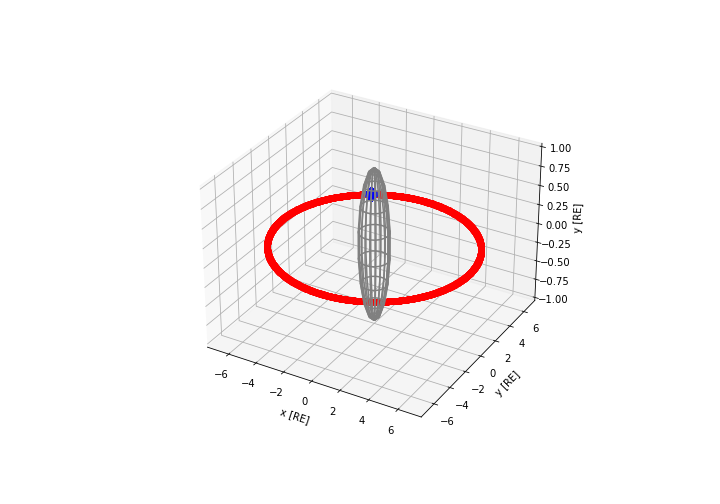

Text(0.5, 0, 'y [RE]')

In [30]:
orbit3d = plt.figure()
ax = orbit3d.add_subplot(projection='3d')
#ax.set_zlim([-6, 6])
for i in range(0, len(t)):
    ax.plot(geocentric.position.km[0][i]/mrad,
            geocentric.position.km[1][i]/mrad,
            geocentric.position.km[2][i]/mrad,
            marker=sunlit[i], color='Red')
    ax.plot(geocentric.position.km[0][-1:]/mrad,
            geocentric.position.km[1][-1:]/mrad,
            geocentric.position.km[2][-1:]/mrad,
            marker='D', markersize=10, color='Blue',)

# draw sphere
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax.plot_wireframe(x, y, z, color="Grey")

ax.set_xlabel('x [RE]')
ax.set_ylabel('y [RE]')
ax.set_zlabel('y [RE]')

In [24]:
subpoints = wgs84.subpoint(geocentric)

eph = load(eph_file)
sunlit = satellite.at(t).is_sunlit(eph)
sunlit = ['.' if i==False else 'o' for i in sunlit]

<IPython.core.display.Javascript object>


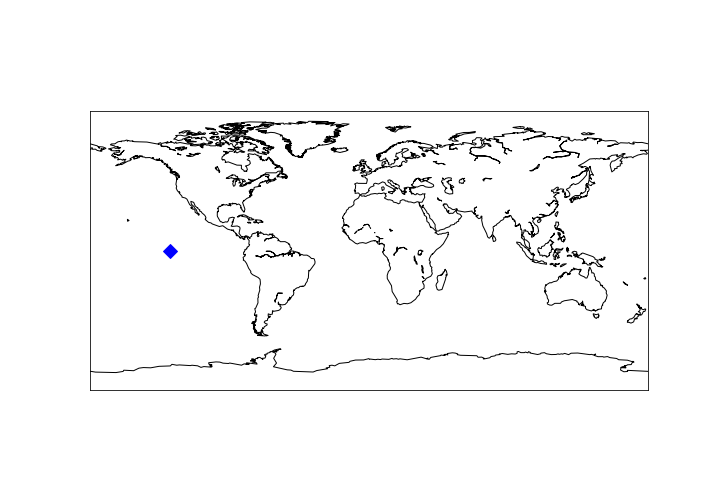

In [25]:
subsat = plt.figure()
map = Basemap()
map.drawcoastlines()
x, y = map(subpoints.longitude.degrees, subpoints.latitude.degrees)
for i in range(0, len(t)):
    map.plot(x[i], y[i], marker=sunlit[i], color='Red')
map.plot(x[-1:], y[-1:], marker='D', markersize=10, color='Blue')
